                                     

                                 *****KNN Classifier Implementation and Data Processing*****

                                 

 - Importing Libraries =   

            imports necessary libraries such as NumPy for numerical operations, Pandas for data manipulation, and Matplotlib for data visualization.

- KNNClassifier Class =
 
            This defines the KNNClassifier class, which implements the k-Nearest Neighbors algorithm for classification. It includes methods for fitting the model, making predictions, calculating distances, and evaluating accuracy, precision, recall, and F1 score.

- Data Preprocessing Functions =

            This contains functions for preprocessing the input data. Specifically, it includes a function to normalize the data and another function to split the data into training and testing sets.

- Main Execution =

           This represents the main execution block of the script. It loads the dataset, preprocesses the data, defines evaluation parameters (values of k and distance metrics), conducts the classification process for different combinations of parameters, plots sample test images with their predicted and actual labels, and prints the evaluation results.

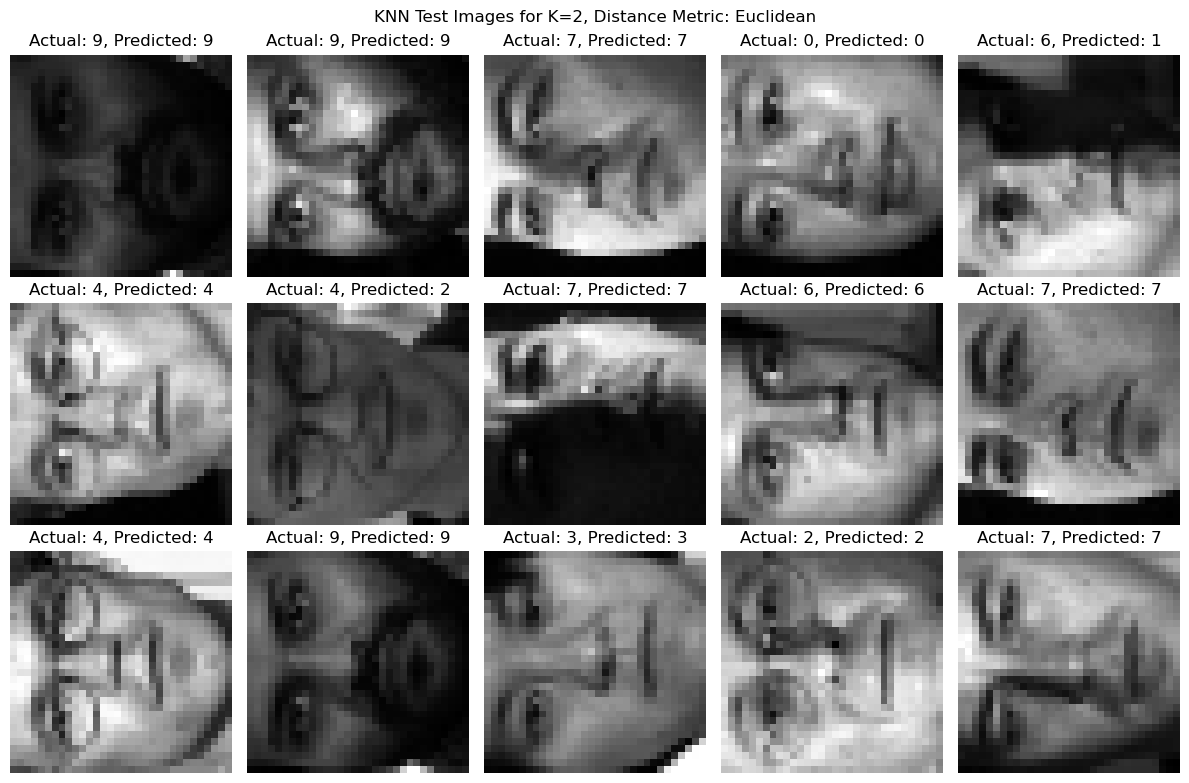

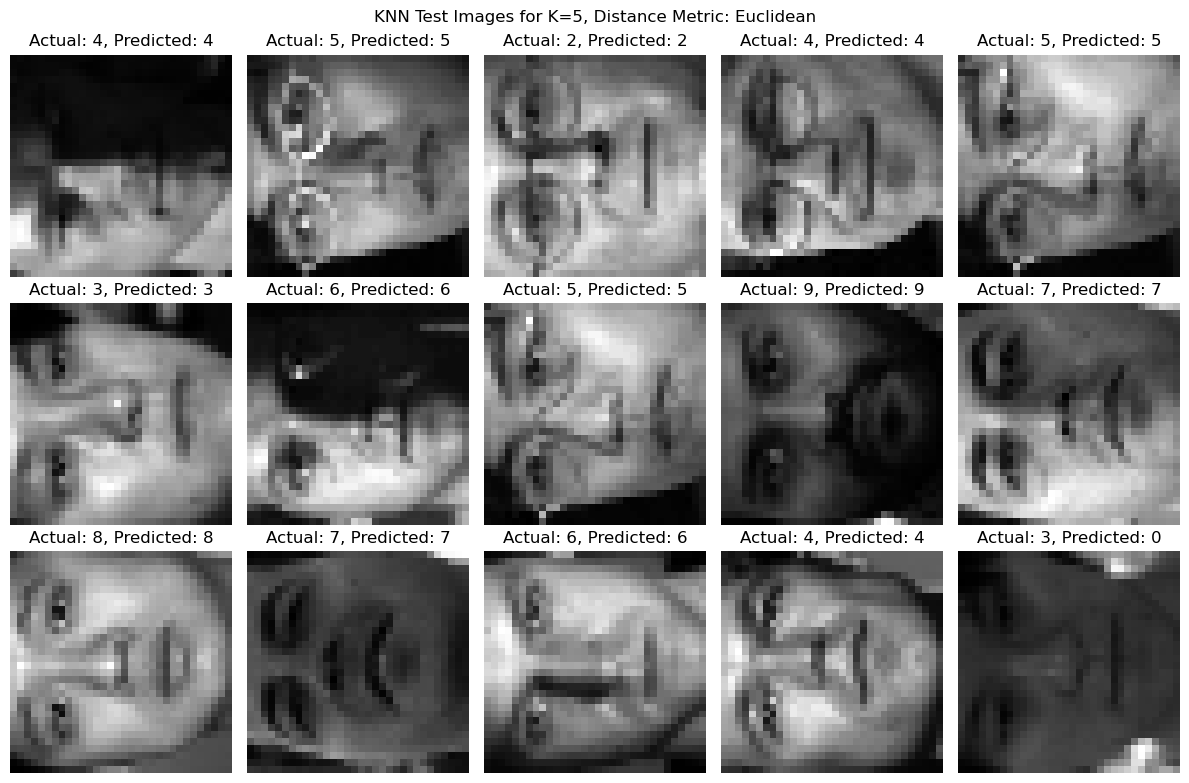

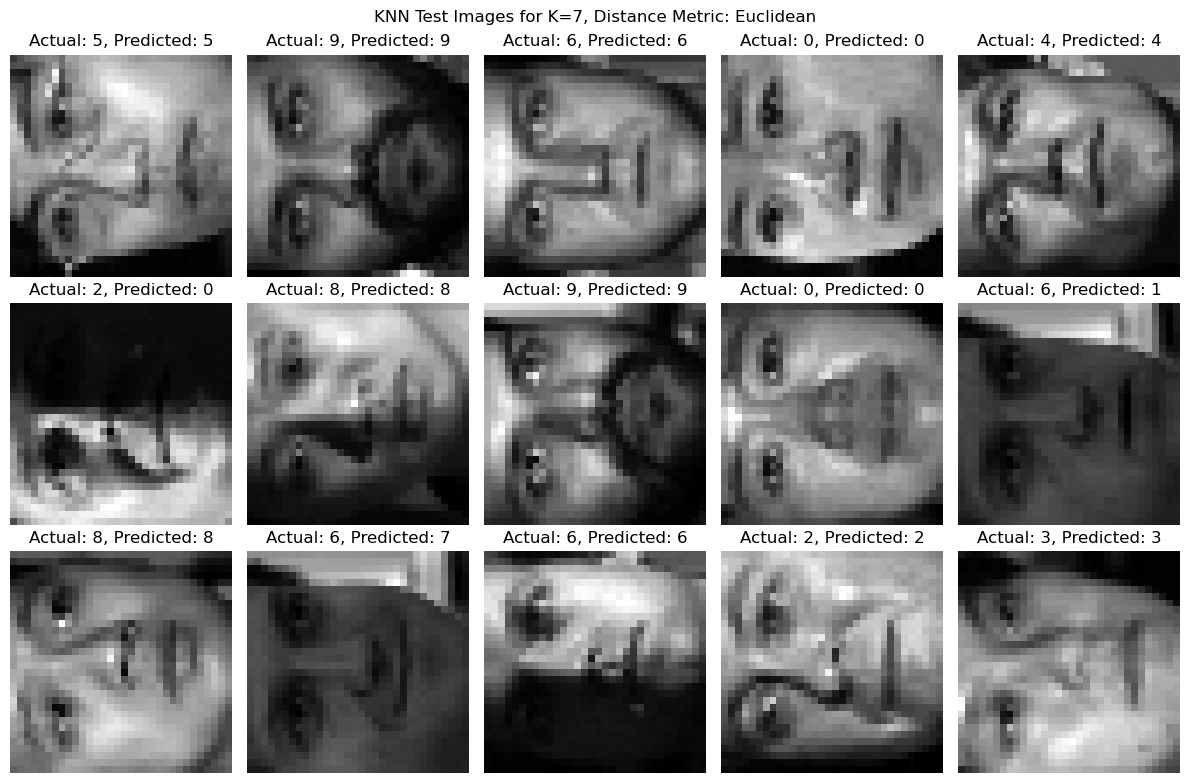

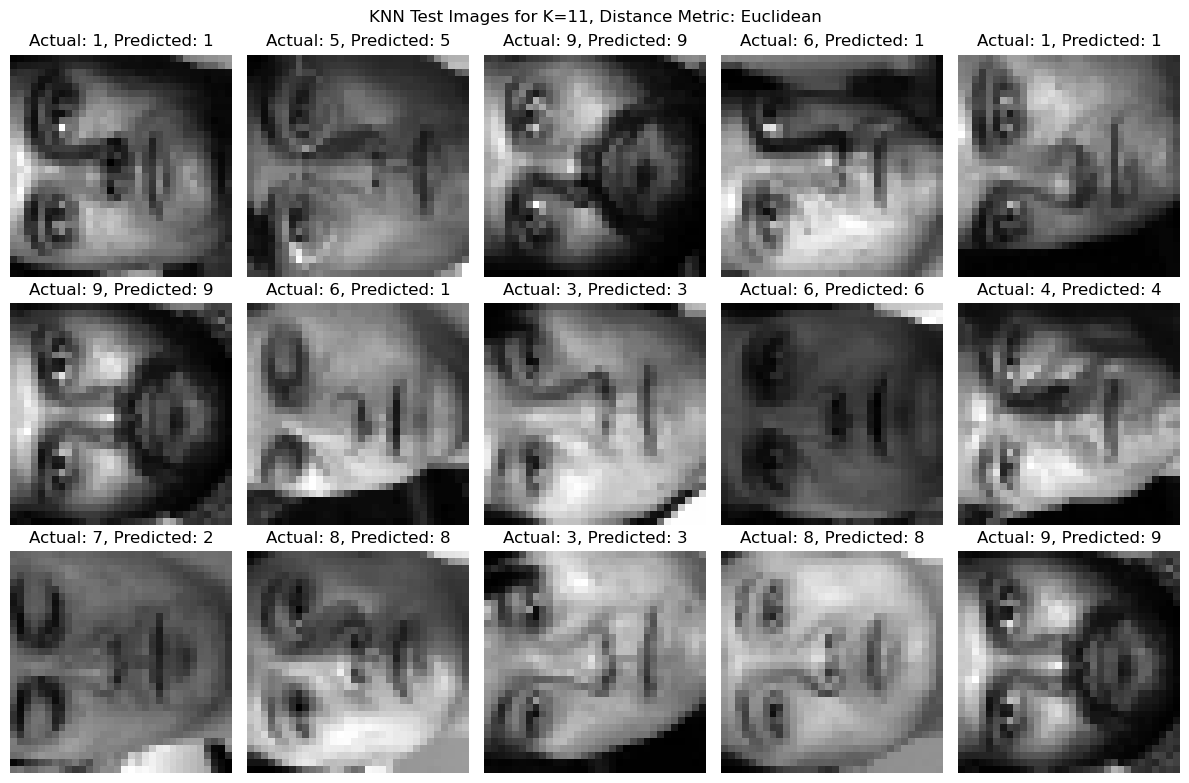

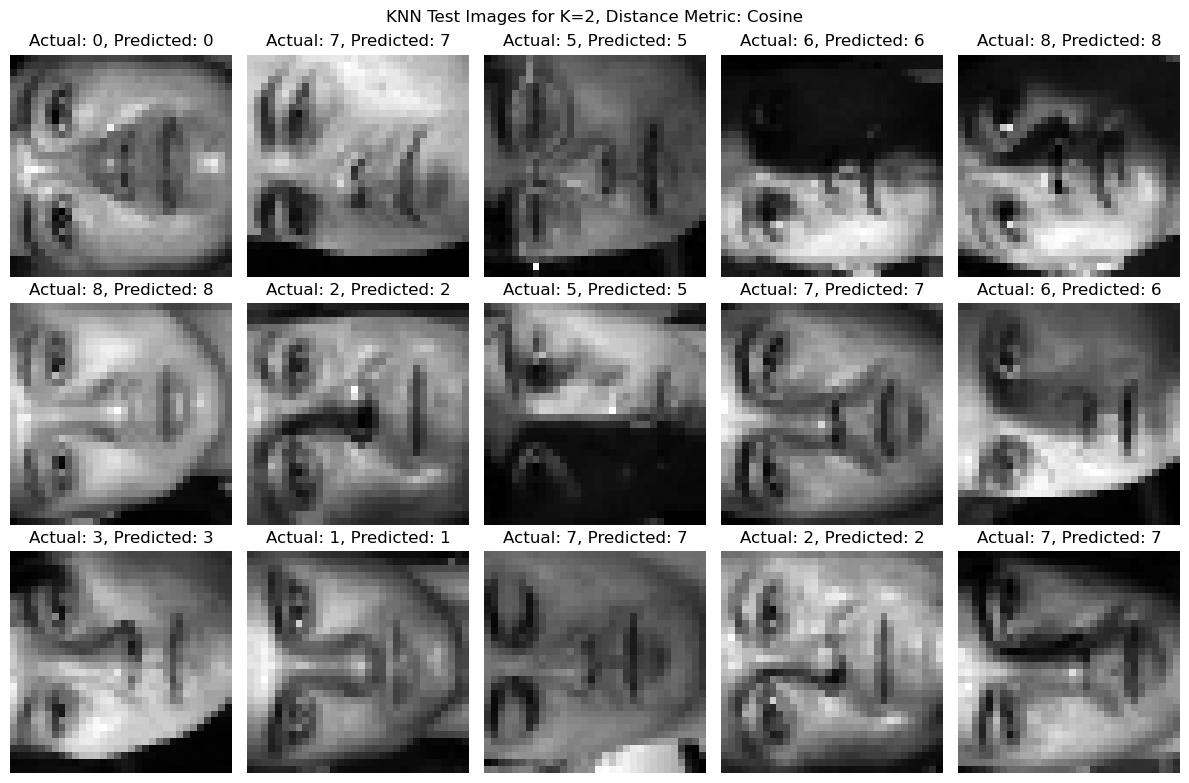

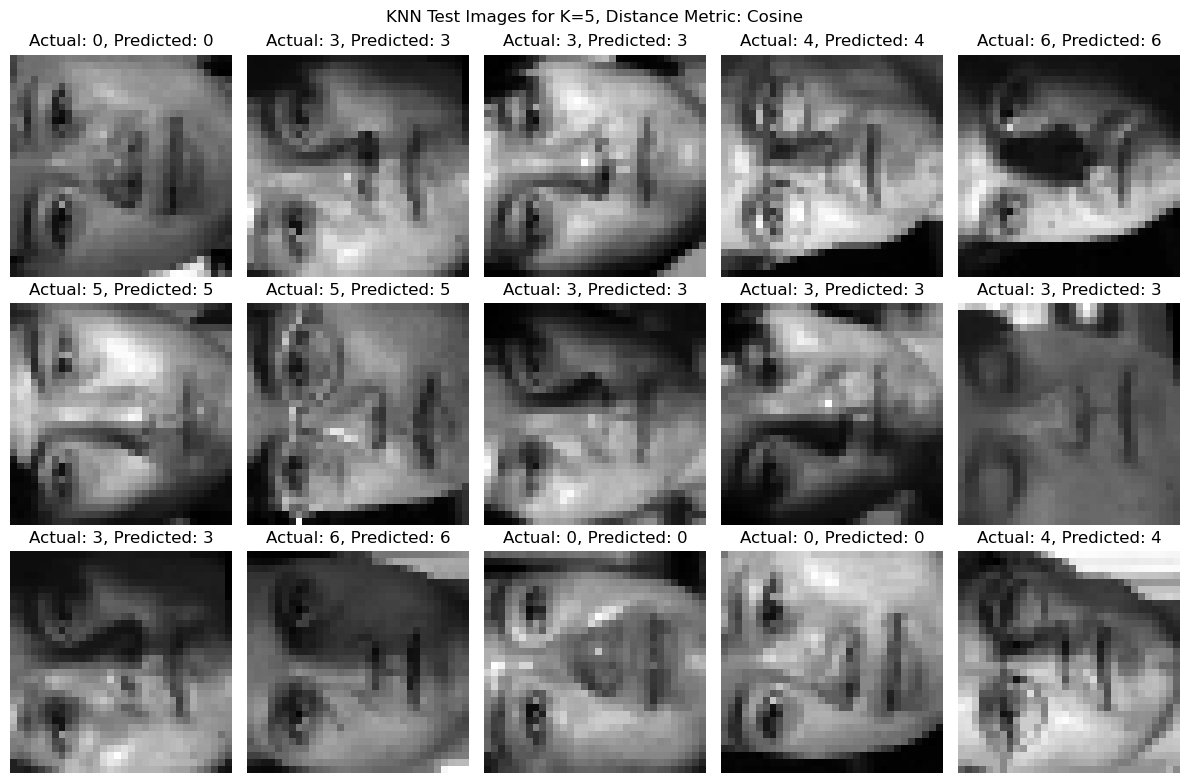

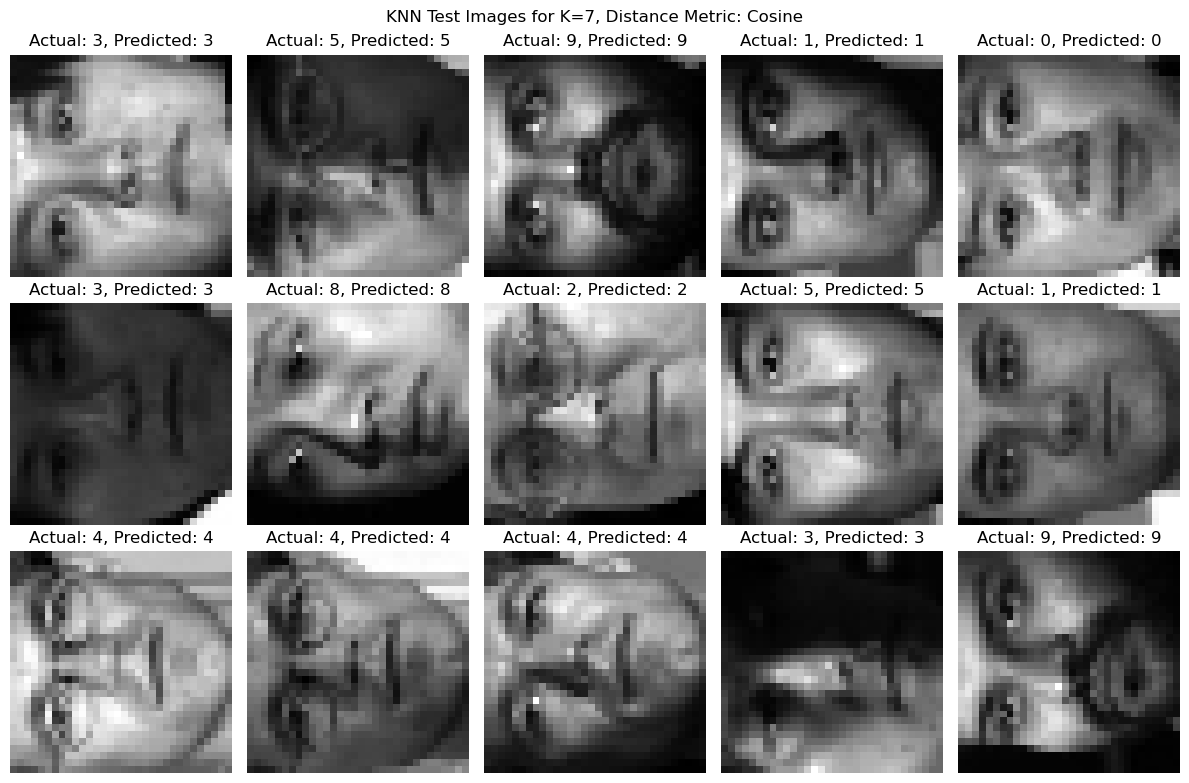

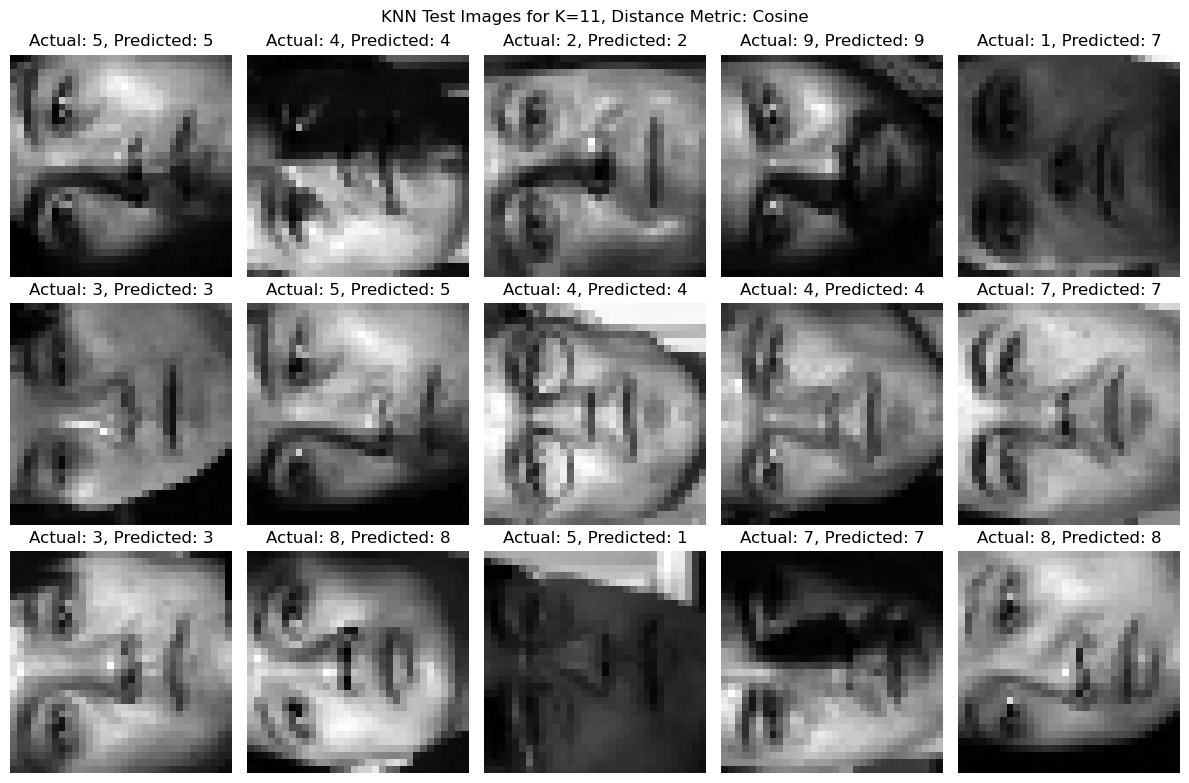

Results:
Distance Metric: euclidean
K=2:
	Accuracy: 94.42857142857143
	Precision: 1.0
	Recall: 1.0
	F1 Score: 1.0

K=5:
	Accuracy: 95.0
	Precision: 1.0
	Recall: 1.0
	F1 Score: 1.0

K=7:
	Accuracy: 91.57142857142857
	Precision: 1.0
	Recall: 1.0
	F1 Score: 1.0

K=11:
	Accuracy: 88.0
	Precision: 1.0
	Recall: 1.0
	F1 Score: 1.0

Distance Metric: cosine
K=2:
	Accuracy: 95.71428571428572
	Precision: 1.0
	Recall: 1.0
	F1 Score: 1.0

K=5:
	Accuracy: 93.28571428571428
	Precision: 1.0
	Recall: 1.0
	F1 Score: 1.0

K=7:
	Accuracy: 90.0
	Precision: 1.0
	Recall: 1.0
	F1 Score: 1.0

K=11:
	Accuracy: 90.57142857142857
	Precision: 1.0
	Recall: 1.0
	F1 Score: 1.0



In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class KNNClassifier:
    def __init__(self, k, distance_metric='euclidean'):
        self.k = k
        self.distance_metric = distance_metric
    
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    
    def predict(self, X_test):
        y_pred = []
        for test_instance in X_test:
            distances = self.calculate_distances(test_instance)
            sorted_indices = np.argsort(distances)
            k_nearest_indices = sorted_indices[:self.k]
            k_nearest_labels = self.y_train[k_nearest_indices]
            unique_labels, counts = np.unique(k_nearest_labels, return_counts=True)
            predicted_label = unique_labels[np.argmax(counts)]
            y_pred.append(predicted_label)
        return np.array(y_pred)
    
    def calculate_distances(self, test_instance):
        if self.distance_metric == 'euclidean':
            return np.sqrt(np.sum((self.X_train - test_instance) ** 2, axis=1))
        elif self.distance_metric == 'cosine':
            magnitudes = np.linalg.norm(self.X_train, axis=1) * np.linalg.norm(test_instance)
            dot_products = np.dot(self.X_train, test_instance)
            similarities = dot_products / magnitudes
            distances = 1 - similarities
            return distances

    def evaluate_accuracy(self, y_true, y_pred):
        accuracy = np.mean(y_true == y_pred) * 100
        return accuracy

    def evaluate_precision_recall_f1(self, y_true, y_pred):
        true_positives = np.sum((y_true == 1) & (y_pred == 1))
        false_positives = np.sum((y_true == 0) & (y_pred == 1))
        false_negatives = np.sum((y_true == 1) & (y_pred == 0))
        
        precision = true_positives / (true_positives + false_positives)
        recall = true_positives / (true_positives + false_negatives)
        f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
        
        return precision, recall, f1_score

def preprocess_data(data):
    normalized_data = data / np.linalg.norm(data, axis=1)[:, np.newaxis]
    return normalized_data

def split_train_test(data, labels, train_size):
    train_data, test_data = [], []
    train_labels, test_labels = [], []
    for i in range(10):
        indices = np.arange(i * 170, (i + 1) * 170)
        np.random.shuffle(indices)
        train_indices = indices[:train_size]
        test_indices = indices[train_size:]
        train_data.extend(data[train_indices])
        test_data.extend(data[test_indices])
        train_labels.extend(labels[train_indices])
        test_labels.extend(labels[test_indices])
    return np.array(train_data), np.array(test_data), np.array(train_labels), np.array(test_labels)

if __name__ == "__main__":
    # Load data
    data = pd.read_csv(r"C:\Users\Dell\Downloads\Data\Q2 Dataset\dataset.csv", header=None).values
    labels = np.repeat(np.arange(10), 170)

    # Preprocess data.
    normalized_data = preprocess_data(data)

    # Values of k to evaluate.
    k_values = [2, 5, 7, 11]

    # Distance metrics to evaluate.
    distance_metrics = ['euclidean', 'cosine']

    # Results storage set
    results = {}

    for distance_metric in distance_metrics:
        results[distance_metric] = {'accuracy': [], 'precision': [], 'recall': [], 'f1_score': []}

        for k in k_values:
            # Split data into train and test sets.
            train_data, test_data, train_labels, test_labels = split_train_test(normalized_data, labels, train_size=100)

            # Initialize k-NN classifier.
            knn_classifier = KNNClassifier(k=k, distance_metric=distance_metric)
            knn_classifier.fit(train_data, train_labels)

            # Predicting labels for test set.
            y_pred = knn_classifier.predict(test_data)

            # Evaluate accuracy.
            accuracy = knn_classifier.evaluate_accuracy(test_labels, y_pred)
            results[distance_metric]['accuracy'].append(accuracy)

            # Evaluating precision, recall, and F1 score
            precision, recall, f1_score = knn_classifier.evaluate_precision_recall_f1(test_labels, y_pred)
            results[distance_metric]['precision'].append(precision)
            results[distance_metric]['recall'].append(recall)
            results[distance_metric]['f1_score'].append(f1_score)

            # Plot some test images with their predicted and actual labels
            fig, axs = plt.subplots(3, 5, figsize=(12, 8))
            for i in range(3):
                for j in range(5):
                    index = np.random.randint(len(test_labels))
                    axs[i, j].imshow(test_data[index].reshape(32, 32), cmap='gray')
                    axs[i, j].set_title(f"Actual: {test_labels[index]}, Predicted: {y_pred[index]}")
                    axs[i, j].axis('off')
            plt.suptitle(f"KNN Test Images for K={k}, Distance Metric: {distance_metric.capitalize()}")
            plt.tight_layout()
            plt.show()

    # Printing results
    print("Results:")
    for distance_metric in distance_metrics:
        print(f"Distance Metric: {distance_metric}")
        for i, k in enumerate(k_values):
            print(f"K={k}:")
            print(f"\tAccuracy: {results[distance_metric]['accuracy'][i]}")
            print(f"\tPrecision: {results[distance_metric]['precision'][i]}")
            print(f"\tRecall: {results[distance_metric]['recall'][i]}")
            print(f"\tF1 Score: {results[distance_metric]['f1_score'][i]}")
            print()



                                                        *****Plotting KNN Metrics vs. K******


We generates line plots to visualize the accuracy of the k-Nearest Neighbors algorithm with different values of k. It uses seaborn and matplotlib for plotting. The plot compares the accuracy scores for both Euclidean and Cosine distance metrics across different values of k.

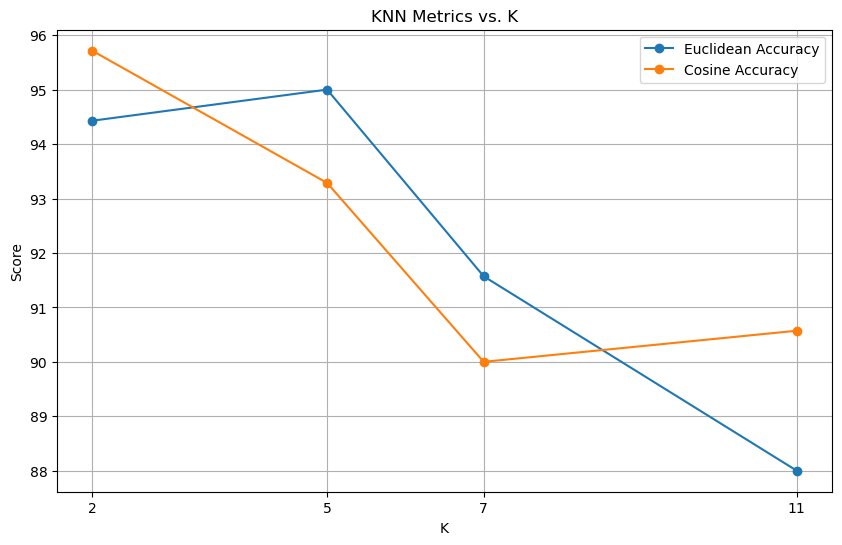

In [13]:
# Values of k to evaluate.
k_values = [2, 5, 7, 11]

import seaborn as sns
import matplotlib.pyplot as plt

# Plot line plots/charts for accuracy
plt.figure(figsize=(10, 6))

# Accuracy
plt.plot(k_values, results['euclidean']['accuracy'], marker='o', label='Euclidean Accuracy')
plt.plot(k_values, results['cosine']['accuracy'], marker='o', label='Cosine Accuracy')


plt.title('KNN Metrics vs. K')
plt.xlabel('K')
plt.ylabel('Score')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()


                                               *********Confusion Matrix Visualization**********

- function to plot the confusion matrix, which is a performance evaluation tool for classification algorithms. The function takes the confusion matrix cm, class labels classes, and an optional title parameter for the plot title. It utilizes numpy and matplotlib for matrix operations and visualization.

-  The plot_confusion_matrix function generates a graphical representation of the confusion matrix, showing the counts of true positive, true negative, false positive, and false negative predictions. The calculate_confusion_matrix function computes the confusion matrix given the true labels and predicted labels. Finally, it plots the confusion matrix using matplotlib.






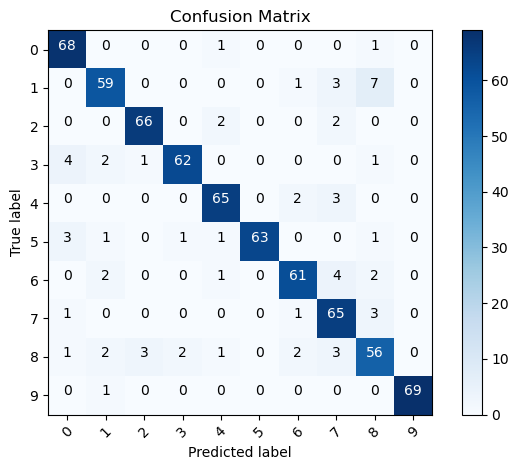

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

#calculate confusion matrix
def calculate_confusion_matrix(y_true, y_pred, num_classes):
    cm = np.zeros((num_classes, num_classes), dtype=int)
    for true_label, pred_label in zip(y_true, y_pred):
        cm[true_label, pred_label] += 1
    return cm


num_classes = 10

cm = calculate_confusion_matrix(test_labels, y_pred, num_classes)

# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=np.arange(num_classes), title='Confusion Matrix')
plt.show()


Performing PCA and Visualizing in 3-D Space On KNN Model

- Functions to perform Principal Component Analysis (PCA) on the training and testing datasets and visualize the data in three-dimensional (3D) space.

- PCA is applied to reduce the dimensionality of the data while preserving its variance. The perform_pca function calculates the principal components and projects the data onto them. 

- The visualize_3d function plots the data points in a 3D scatter plot, with each class represented by a distinct color. This visualization helps to understand the distribution of the data after dimensionality reduction using PCA. The title of each plot indicates that PCA is applied within the context of the KNN model

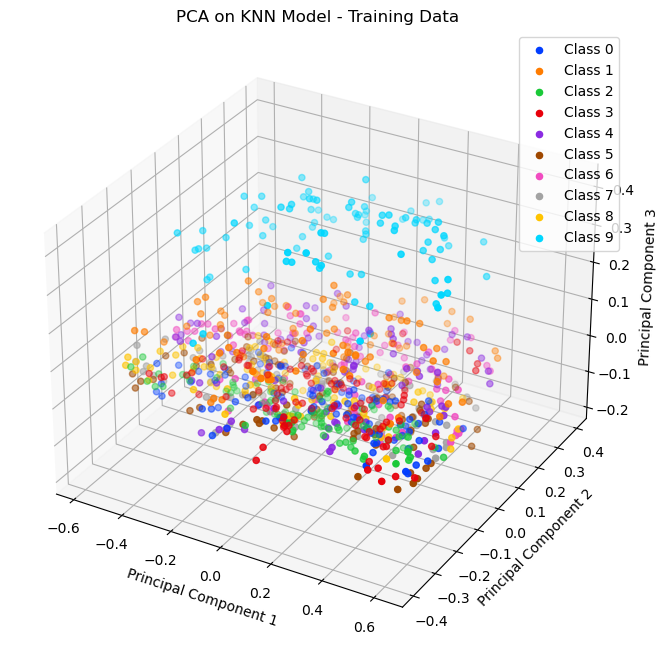

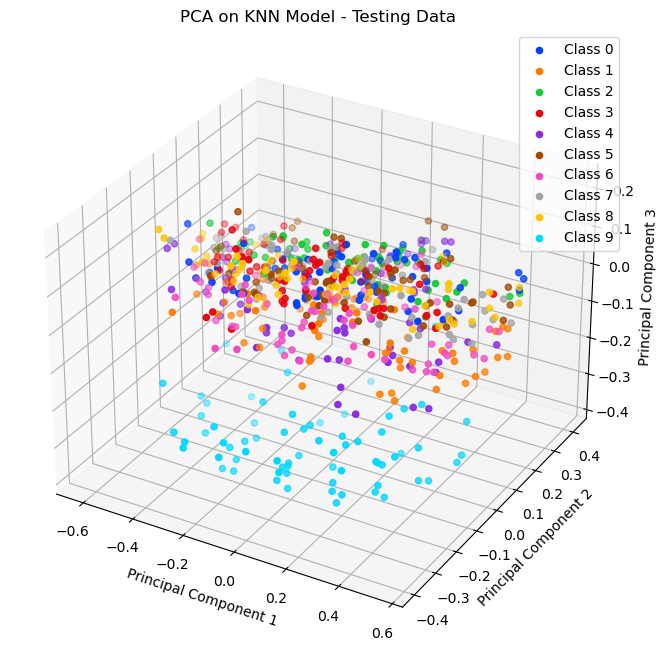

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Perform PCA
def perform_pca(data, n_components=3):
    # Calculate mean of data
    mean = np.mean(data, axis=0)
    # Center the data
    centered_data = data - mean
    # Calculate covariance matrix
    cov_matrix = np.cov(centered_data, rowvar=False)
    # Perform eigen decomposition
    eigen_values, eigen_vectors = np.linalg.eigh(cov_matrix)
    # Sort eigen values and vectors
    sorted_indices = np.argsort(eigen_values)[::-1]
    sorted_eigen_values = eigen_values[sorted_indices]
    sorted_eigen_vectors = eigen_vectors[:, sorted_indices]
    # Select top n_components eigen vectors
    principal_components = sorted_eigen_vectors[:, :n_components]
    # Project data onto principal components
    projected_data = np.dot(centered_data, principal_components)
    return projected_data

# Visualize in 3-D space
def visualize_3d(data, labels, title):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    for label in np.unique(labels):
        indices = np.where(labels == label)
        ax.scatter(data[indices, 0], data[indices, 1], data[indices, 2], label=f'Class {label}', cmap='tab10')
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_zlabel('Principal Component 3')
    ax.set_title(title)
    ax.legend()
    plt.show()

# Perform PCA on training and testing datasets
train_data_pca = perform_pca(train_data)
test_data_pca = perform_pca(test_data)

# Set a vibrant and high contrast color palette
sns.set_palette("bright")

# Visualize in 3-D space
visualize_3d(train_data_pca, train_labels, title='PCA on KNN Model - Training Data')
visualize_3d(test_data_pca, test_labels, title='PCA on KNN Model - Testing Data')


                      *********Gaussian Naive Bayes Classification***********

PURPOSE =

 A Gaussian Naive Bayes (NB) classifier for the task of image classification.  The classifier assumes that features follow a Gaussian distribution and calculates the likelihood of each class given the features using the Gaussian probability density function. 

STEPS =


- Load, preprocess, and split the dataset into training and testing sets.
- Train the Gaussian Naive Bayes classifier on the training data.
- Predict labels for the test data using the trained classifier.
- Visualize some test images with their predicted and actual labels to assess classifier performance.
- Evaluate the accuracy of the classifier.

c:\Users\Dell\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


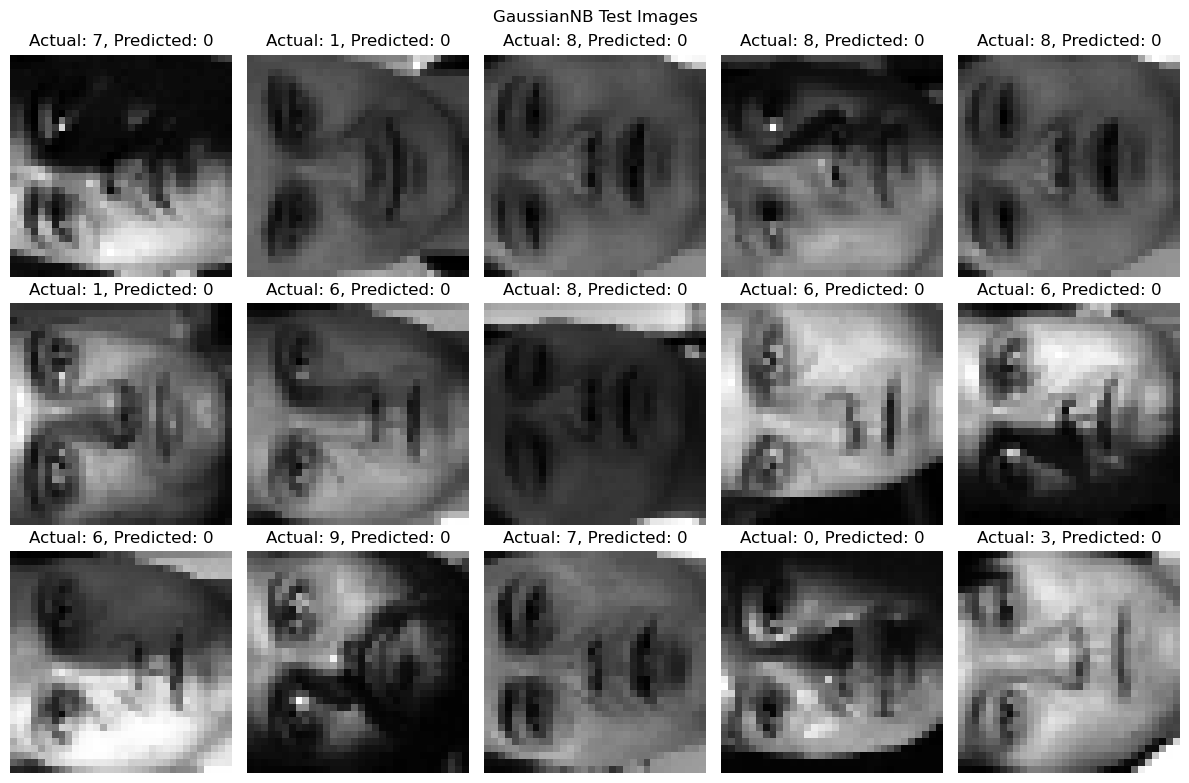

Accuracy: 10.0%


c:\Users\Dell\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


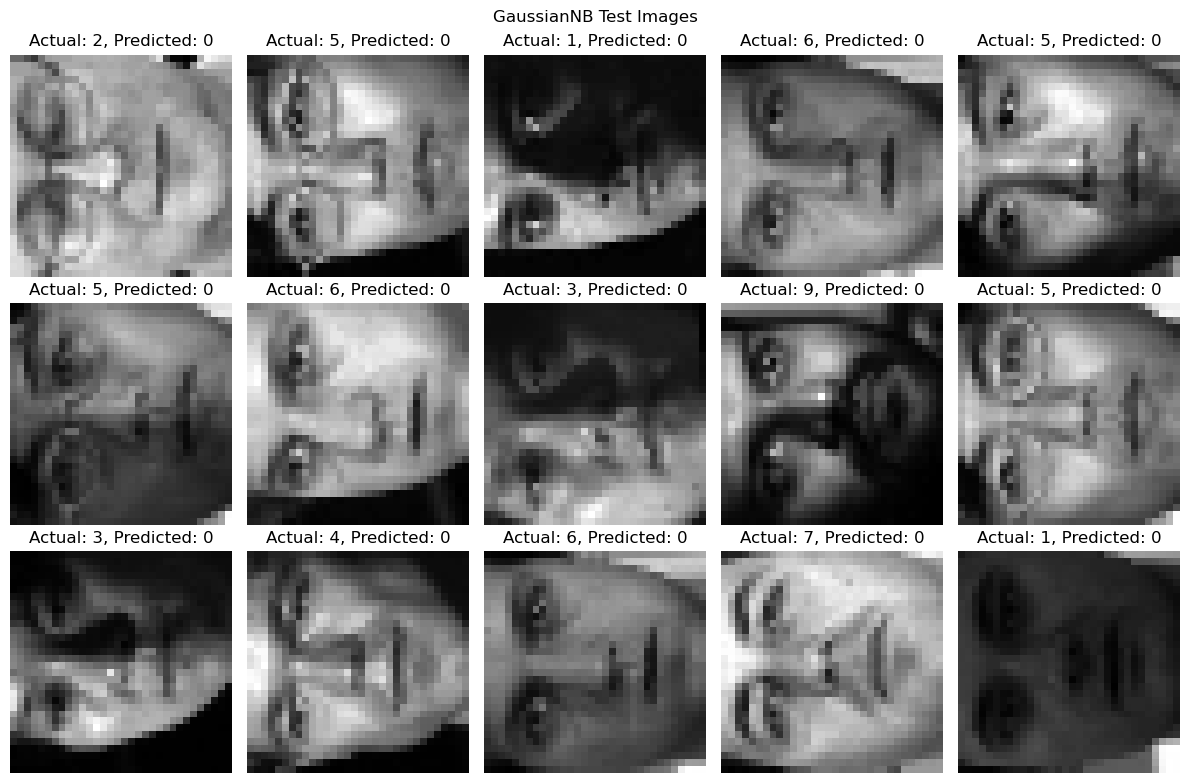

Accuracy: 10.0%


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class GaussianNB:
    def __init__(self):
        pass
    
    def fit(self, X_train, y_train):
        self.classes = np.unique(y_train)
        self.parameters = []
        for label in self.classes:
            X_label = X_train[y_train == label]
            mean = np.mean(X_label, axis=0)
            std = np.std(X_label, axis=0)
            params = {'mean': mean, 'std': std}
            self.parameters.append(params)
    
    def predict(self, X_test):
        predictions = []
        for instance in X_test:
            probabilities = []
            for params in self.parameters:
                mean = params['mean']
                std = params['std']
                likelihood = np.exp(-((instance - mean) ** 2) / (2 * (std ** 2))) / (np.sqrt(2 * np.pi) * std)
                probability = np.prod(likelihood)
                probabilities.append(probability)
            prediction = self.classes[np.argmax(probabilities)]
            predictions.append(prediction)
        return np.array(predictions)

# Load data
data = pd.read_csv(r"C:\Users\Dell\Downloads\Data\Q2 Dataset\dataset.csv", header=None).values
labels = np.repeat(np.arange(10), 170)

# Preprocess data
normalized_data = data / np.linalg.norm(data, axis=1)[:, np.newaxis]

# Split data into train and test sets
def split_train_test(data, labels, train_size):
    train_data, test_data = [], []
    train_labels, test_labels = [], []
    for i in range(10):
        indices = np.arange(i * 170, (i + 1) * 170)
        np.random.shuffle(indices)
        train_indices = indices[:train_size]
        test_indices = indices[train_size:]
        train_data.extend(data[train_indices])
        test_data.extend(data[test_indices])
        train_labels.extend(labels[train_indices])
        test_labels.extend(labels[test_indices])
    return np.array(train_data), np.array(test_data), np.array(train_labels), np.array(test_labels)

train_data, test_data, train_labels, test_labels = split_train_test(normalized_data, labels, train_size=100)

# Train GaussianNB classifier
nb_classifier = GaussianNB()
nb_classifier.fit(train_data, train_labels)

# Predict labels for test set
y_pred = nb_classifier.predict(test_data)

# Plot some test images with their predicted and actual labels
fig, axs = plt.subplots(3, 5, figsize=(12, 8))
for i in range(3):
    for j in range(5):
        index = np.random.randint(len(test_labels))
        axs[i, j].imshow(test_data[index].reshape(32, 32), cmap='gray')
        axs[i, j].set_title(f"Actual: {test_labels[index]}, Predicted: {y_pred[index]}")
        axs[i, j].axis('off')
plt.suptitle("GaussianNB Test Images")
plt.tight_layout()
plt.show()

# Evaluate accuracy
accuracy = np.mean(test_labels == y_pred) * 100
print(f"Accuracy: {accuracy}%")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class GaussianNB:
    def __init__(self):
        pass
    
    def fit(self, X_train, y_train):
        self.classes = np.unique(y_train)
        self.parameters = []
        for label in self.classes:
            X_label = X_train[y_train == label]
            mean = np.mean(X_label, axis=0)
            std = np.std(X_label, axis=0)
            params = {'mean': mean, 'std': std}
            self.parameters.append(params)
    
    def predict(self, X_test):
        predictions = []
        for instance in X_test:
            probabilities = []
            for params in self.parameters:
                mean = params['mean']
                std = params['std']
                likelihood = np.exp(-((instance - mean) ** 2) / (2 * (std ** 2))) / (np.sqrt(2 * np.pi) * std)
                probability = np.prod(likelihood)
                probabilities.append(probability)
            prediction = self.classes[np.argmax(probabilities)]
            predictions.append(prediction)
        return np.array(predictions)

# Load data
data = pd.read_csv(r"C:\Users\Dell\Downloads\Data\Q2 Dataset\dataset.csv", header=None).values
labels = np.repeat(np.arange(10), 170)

# Preprocess data
normalized_data = data / np.linalg.norm(data, axis=1)[:, np.newaxis]

# Split data into train and test sets
def split_train_test(data, labels, train_size):
    train_data, test_data = [], []
    train_labels, test_labels = [], []
    for i in range(10):
        indices = np.arange(i * 170, (i + 1) * 170)
        np.random.shuffle(indices)
        train_indices = indices[:train_size]
        test_indices = indices[train_size:]
        train_data.extend(data[train_indices])
        test_data.extend(data[test_indices])
        train_labels.extend(labels[train_indices])
        test_labels.extend(labels[test_indices])
    return np.array(train_data), np.array(test_data), np.array(train_labels), np.array(test_labels)

train_data, test_data, train_labels, test_labels = split_train_test(normalized_data, labels, train_size=100)

# Train GaussianNB classifier
nb_classifier = GaussianNB()
nb_classifier.fit(train_data, train_labels)

# Predict labels for test set
y_pred = nb_classifier.predict(test_data)

# Plot some test images with their predicted and actual labels
fig, axs = plt.subplots(3, 5, figsize=(12, 8))
for i in range(3):
    for j in range(5):
        index = np.random.randint(len(test_labels))
        axs[i, j].imshow(test_data[index].reshape(32, 32), cmap='gray')
        axs[i, j].set_title(f"Actual: {test_labels[index]}, Predicted: {y_pred[index]}")
        axs[i, j].axis('off')
plt.suptitle("GaussianNB Test Images")
plt.tight_layout()
plt.show()

# Evaluate accuracy
accuracy = np.mean(test_labels == y_pred) * 100
print(f"Accuracy: {accuracy}%")


                                        ************* Support Vector Machine (SVM) Classification ************

PURPOSE =

The SVM class is implemented with methods for fitting the model to the training data and predicting labels for the test data using gradient descent optimization. 

STEPS =

- Load, preprocess, and split the dataset into training and testing sets.
- Train the SVM classifier on the training data using gradient descent optimization.
- Predict labels for the test data using the trained SVM classifier.
- Visualize some test images with their predicted and actual labels to assess classifier performance.
- Evaluate the accuracy of the classifier.

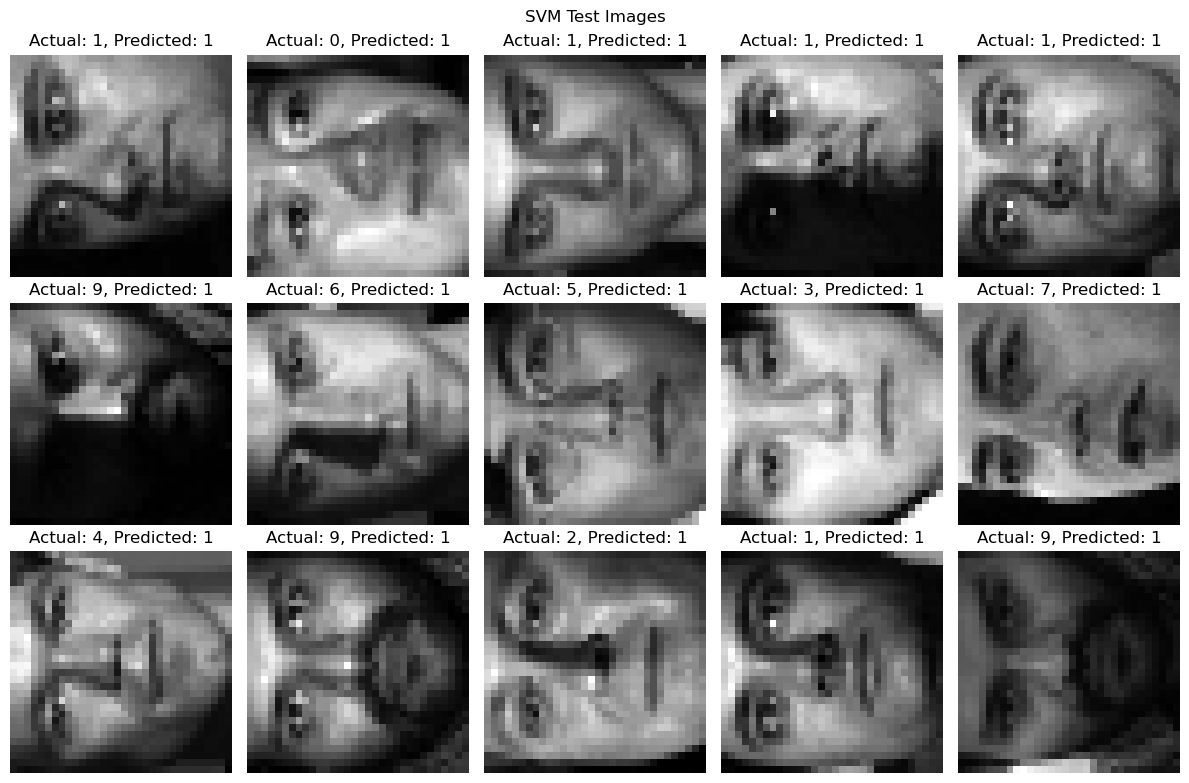

Accuracy: 10.0%


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        # Initialize parameters
        self.w = np.zeros(n_features)
        self.b = 0
        
        # Gradient Descent
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y[idx]))
                    self.b -= self.lr * y[idx]
    
    def predict(self, X):
        return np.sign(np.dot(X, self.w) - self.b)

# Load data
data = pd.read_csv(r"C:\Users\Dell\Downloads\Data\Q2 Dataset\dataset.csv", header=None).values
labels = np.repeat(np.arange(10), 170)

# Preprocess data
normalized_data = data / np.linalg.norm(data, axis=1)[:, np.newaxis]

# Split data into train and test sets
def split_train_test(data, labels, train_size):
    train_data, test_data = [], []
    train_labels, test_labels = [], []
    for i in range(10):
        indices = np.arange(i * 170, (i + 1) * 170)
        np.random.shuffle(indices)
        train_indices = indices[:train_size]
        test_indices = indices[train_size:]
        train_data.extend(data[train_indices])
        test_data.extend(data[test_indices])
        train_labels.extend(labels[train_indices])
        test_labels.extend(labels[test_indices])
    return np.array(train_data), np.array(test_data), np.array(train_labels), np.array(test_labels)

train_data, test_data, train_labels, test_labels = split_train_test(normalized_data, labels, train_size=100)

# Train SVM classifier
svm_classifier = SVM()
svm_classifier.fit(train_data, train_labels)

# Predict labels for test set
y_pred = svm_classifier.predict(test_data)

# Plot some test images with their predicted and actual labels
fig, axs = plt.subplots(3, 5, figsize=(12, 8))
for i in range(3):
    for j in range(5):
        index = np.random.randint(len(test_labels))
        axs[i, j].imshow(test_data[index].reshape(32, 32), cmap='gray')
        axs[i, j].set_title(f"Actual: {test_labels[index]}, Predicted: {int(y_pred[index])}")
        axs[i, j].axis('off')
plt.suptitle("SVM Test Images")
plt.tight_layout()
plt.show()

# Evaluate accuracy
accuracy = np.mean(test_labels == y_pred) * 100
print(f"Accuracy: {accuracy}%")


                                ********Model Accuracy Comparison**********

Visualizes the comparison of accuracy among different machine learning models using a bar plot. The models considered for comparison are K-Nearest Neighbors (KNN), Support Vector Machine (SVM), and Gaussian Naive Bayes (GaussianNB). 
 - The accuracy values for each model are represented on the y-axis, while the models are displayed on the x-axis. 
 - The bar plot provides a quick and intuitive comparison of the performance of each model in terms of accuracy.

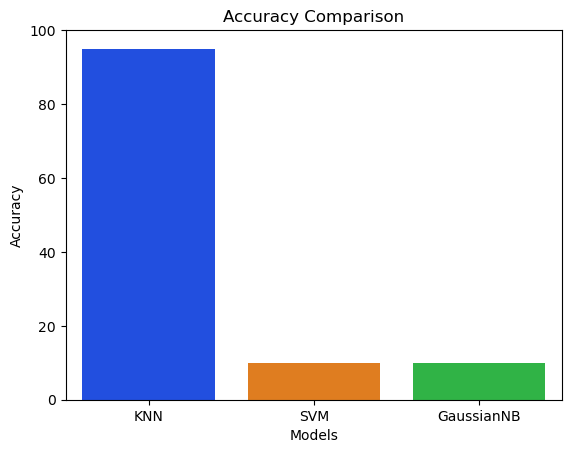

In [23]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Accuracy comparison
models = ['KNN', 'SVM', 'GaussianNB']
accuracies = [95.0, 10.0, 10.0]  # Replace with actual accuracy values
sns.barplot(x=models, y=accuracies)
plt.title('Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 100)
plt.show()


Principal Component Analysis (PCA) on the training and testing data of three machine learning models: K-Nearest Neighbors (KNN), Support Vector Machine (SVM), and Gaussian Naive Bayes (GaussianNB)

STEPS =

  - Perform Principal Component Analysis (PCA) on the training and testing data of KNN, SVM, and GaussianNB models.
  - Reduce the dimensionality of the data to three principal components.
  - Plot the reduced-dimensional data points in a 3D space.
  - Differentiate between data points belonging to different models (KNN, SVM, and GaussianNB) using distinct colors.
  - Differentiate between training and testing data points using different shades of colors.
  - Visualize the distribution of data points among models and between training and testing sets to gain insights into their relationships and separability.

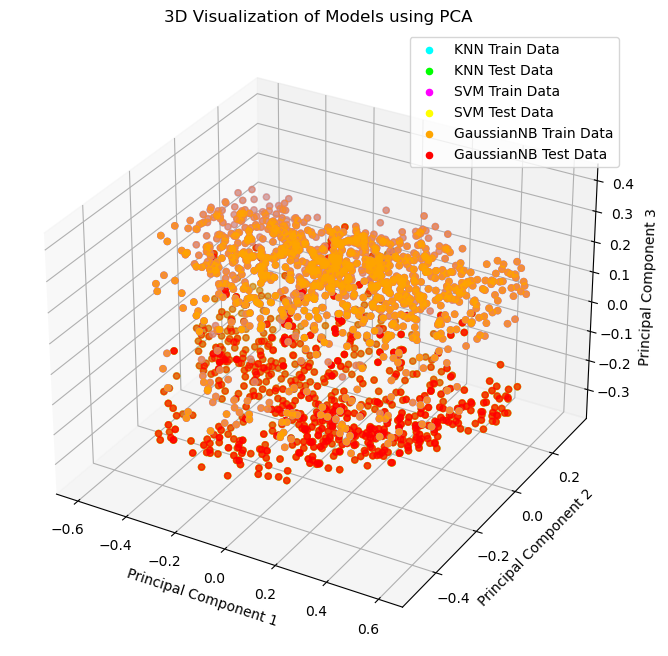

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have KNN, SVM, and GaussianNB models implemented

# Define a function to perform PCA
def perform_pca(data, n_components=3):
    cov_matrix = np.cov(data, rowvar=False)
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    sorted_indices = np.argsort(eigenvalues)[::-1]
    top_indices = sorted_indices[:n_components]
    top_eigenvectors = eigenvectors[:, top_indices]
    reduced_data = np.dot(data, top_eigenvectors)
    return reduced_data

# Perform PCA on the training and testing data for all three models
knn_train_reduced = perform_pca(train_data)
knn_test_reduced = perform_pca(test_data)
svm_train_reduced = perform_pca(train_data)
svm_test_reduced = perform_pca(test_data)
nb_train_reduced = perform_pca(train_data)
nb_test_reduced = perform_pca(test_data)

# Plot the reduced-dimensional data in 3D space
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot KNN data points
ax.scatter(knn_train_reduced[:, 0], knn_train_reduced[:, 1], knn_train_reduced[:, 2], c='cyan', label='KNN Train Data')
ax.scatter(knn_test_reduced[:, 0], knn_test_reduced[:, 1], knn_test_reduced[:, 2], c='lime', label='KNN Test Data')

# Plot SVM data points
ax.scatter(svm_train_reduced[:, 0], svm_train_reduced[:, 1], svm_train_reduced[:, 2], c='magenta', label='SVM Train Data')
ax.scatter(svm_test_reduced[:, 0], svm_test_reduced[:, 1], svm_test_reduced[:, 2], c='yellow', label='SVM Test Data')

# Plot GaussianNB data points
ax.scatter(nb_train_reduced[:, 0], nb_train_reduced[:, 1], nb_train_reduced[:, 2], c='orange', label='GaussianNB Train Data')
ax.scatter(nb_test_reduced[:, 0], nb_test_reduced[:, 1], nb_test_reduced[:, 2], c='red', label='GaussianNB Test Data')

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D Visualization of Models using PCA')
ax.legend()
plt.show()


PCA Visualization of SVM and GaussianNB

- In this visualization, the reduced-dimensional data obtained through Principal Component Analysis (PCA)
  for the Support Vector Machine (SVM) and Gaussian Naive Bayes (GaussianNB) models are presented in 3D space. 

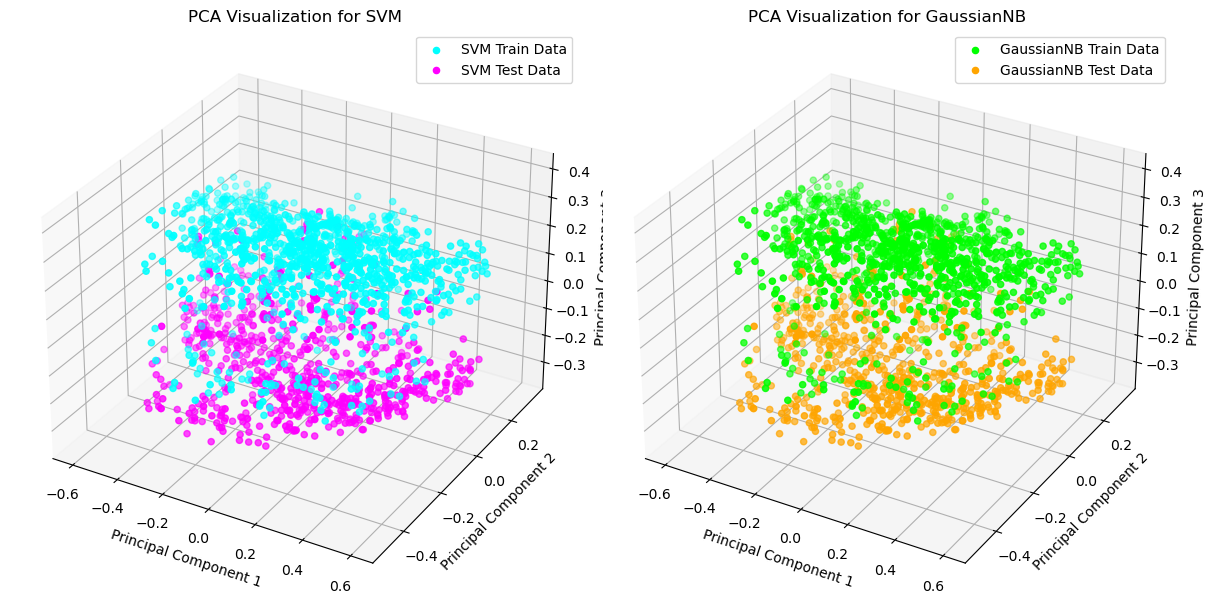

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have SVM and GaussianNB models implemented

# Define a function to perform PCA
def perform_pca(data, n_components=3):
    cov_matrix = np.cov(data, rowvar=False)
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    sorted_indices = np.argsort(eigenvalues)[::-1]
    top_indices = sorted_indices[:n_components]
    top_eigenvectors = eigenvectors[:, top_indices]
    reduced_data = np.dot(data, top_eigenvectors)
    return reduced_data

# Perform PCA on the training and testing data for SVM
svm_train_reduced = perform_pca(train_data)
svm_test_reduced = perform_pca(test_data)

# Perform PCA on the training and testing data for GaussianNB
nb_train_reduced = perform_pca(train_data)
nb_test_reduced = perform_pca(test_data)

# Plot the reduced-dimensional data in 3D space for SVM
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(svm_train_reduced[:, 0], svm_train_reduced[:, 1], svm_train_reduced[:, 2], c='cyan', label='SVM Train Data')
ax1.scatter(svm_test_reduced[:, 0], svm_test_reduced[:, 1], svm_test_reduced[:, 2], c='magenta', label='SVM Test Data')
ax1.set_title('PCA Visualization for SVM')
ax1.set_xlabel('Principal Component 1')
ax1.set_ylabel('Principal Component 2')
ax1.set_zlabel('Principal Component 3')
ax1.legend()

# Plot the reduced-dimensional data in 3D space for GaussianNB
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(nb_train_reduced[:, 0], nb_train_reduced[:, 1], nb_train_reduced[:, 2], c='lime', label='GaussianNB Train Data')
ax2.scatter(nb_test_reduced[:, 0], nb_test_reduced[:, 1], nb_test_reduced[:, 2], c='orange', label='GaussianNB Test Data')
ax2.set_title('PCA Visualization for GaussianNB')
ax2.set_xlabel('Principal Component 1')
ax2.set_ylabel('Principal Component 2')
ax2.set_zlabel('Principal Component 3')
ax2.legend()

plt.tight_layout()
plt.show()
